## Session 17 Assignment 1

In this assignment students have to make ARIMA model over shampoo sales data and check the MSE between predicted and actual value.

Student can download data in .csv format from the following link:

https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period#!ds=22r0&display=line

In [23]:
# Importing module and assigning alias for them.
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [24]:
# Defining funtion to parse date-time
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('sales-of-shampoo.csv', delimiter=",", header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [25]:
series.head()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64

In [26]:
# Splitting the dataset into the Training set and Test set
X = series.values
size = int(len(X) * 0.66)
X_train, X_test, = X[0:size], X[size:len(X)]
print("X-TRAINING DATA:\n",X_train)
print("X-TEST DATA:\n",X_test)

X-TRAINING DATA:
 [266.  145.9 183.1 119.3 180.3 168.5 231.8 224.5 192.8 122.9 336.5 185.9
 194.3 149.5 210.1 273.3 191.4 287.  226.  303.6 289.9 421.6 264.5]
X-TEST DATA:
 [342.3 339.7 440.4 315.9 439.3 401.3 437.4 575.5 407.6 682.  475.3 581.3
 646.9]


In [27]:
predictions = list()
#Iterating over test data
for t in range(len(X_test)):
    #model fitting to the training data set
    model = ARIMA(X_train, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    predictions.append(output[0])
    observation = X_test[t]
    X_train = [x for x in X_train]
    X_train.append(observation)
    print('predicted=%f, expected=%f' % (output[0], observation))
error = mean_squared_error(X_test, predictions)
print('Test MSE: %.3f' % error)

C:\Users\Swami\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Swami\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\Swami\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

predicted=349.117712, expected=342.300000
predicted=306.512952, expected=339.700000
predicted=387.376449, expected=440.400000
predicted=348.154255, expected=315.900000
predicted=386.308818, expected=439.300000
predicted=356.082087, expected=401.300000
predicted=446.379462, expected=437.400000
predicted=394.737224, expected=575.500000
predicted=434.915402, expected=407.600000
predicted=507.923547, expected=682.000000
predicted=435.482779, expected=475.300000
predicted=652.743826, expected=581.300000
predicted=546.343519, expected=646.900000
Test MSE: 6958.324


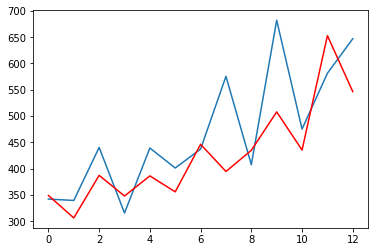

In [28]:
# plotting test and prediction data
pyplot.plot(X_test)
pyplot.plot(predictions, color='red')
pyplot.show()